In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/natural_images.zip'


Streaming output truncated to the last 5000 lines.
  inflating: natural_images/person/person_0513.jpg  
  inflating: __MACOSX/natural_images/person/._person_0513.jpg  
  inflating: natural_images/person/person_0275.jpg  
  inflating: __MACOSX/natural_images/person/._person_0275.jpg  
  inflating: natural_images/person/person_0249.jpg  
  inflating: __MACOSX/natural_images/person/._person_0249.jpg  
  inflating: natural_images/person/person_0922.jpg  
  inflating: __MACOSX/natural_images/person/._person_0922.jpg  
  inflating: natural_images/person/person_0088.jpg  
  inflating: __MACOSX/natural_images/person/._person_0088.jpg  
  inflating: natural_images/person/person_0936.jpg  
  inflating: __MACOSX/natural_images/person/._person_0936.jpg  
  inflating: natural_images/person/person_0705.jpg  
  inflating: __MACOSX/natural_images/person/._person_0705.jpg  
  inflating: natural_images/person/person_0063.jpg  
  inflating: __MACOSX/natural_images/person/._person_0063.jpg  
  inflating: 

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import keras
import random
from PIL import Image
from numpy import asarray

In [ ]:
def getImagesFromDirectory(train_data_gen, validation_data_gen, directory, image_size=(180,180), batch_size=8, shuffle=True):
    train_dataset = train_data_gen.flow_from_directory(directory,
                                                    target_size=image_size, 
                                                    batch_size=batch_size,
                                                    subset='training',
                                                    class_mode='categorical',
                                                    shuffle=True,
                                                    seed=123)
    validation_dataset = validation_data_gen.flow_from_directory(directory,
                                                          target_size=image_size,
                                                          batch_size=batch_size,
                                                          shuffle=True,
                                                          subset='validation',
                                                          class_mode='categorical',
                                                          seed=123)
    
  
    return train_dataset, validation_dataset

In [ ]:
cc

Found 6213 images belonging to 8 classes.
Found 686 images belonging to 8 classes.


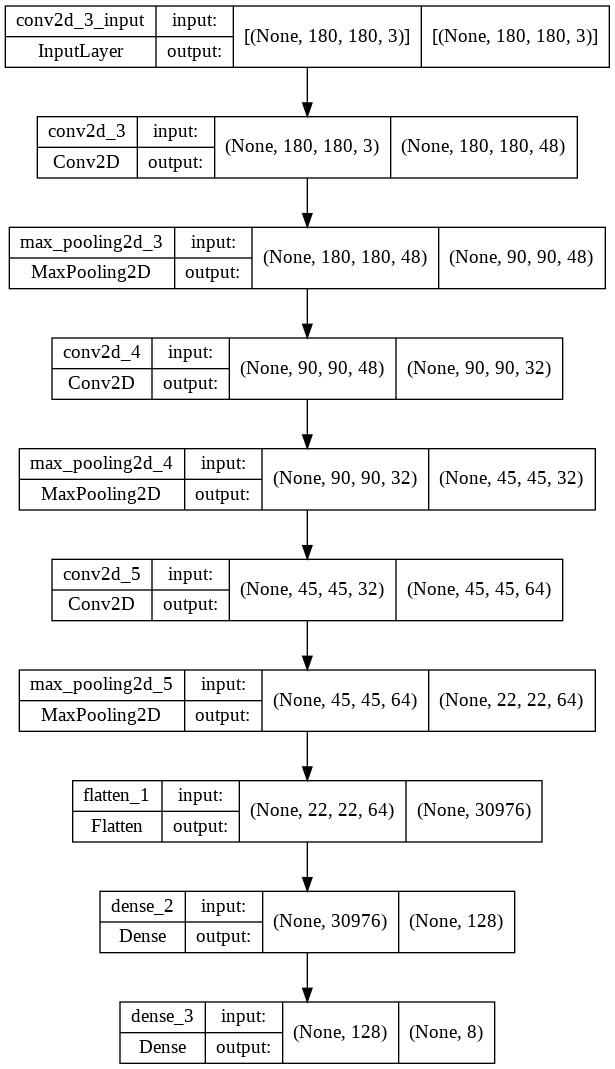

In [ ]:
def model1(input_shape, pool_size=(2,2)):
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(48, 2,padding='same', input_shape = input_shape, activation = 'relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = pool_size))
    
    model.add(tf.keras.layers.Conv2D(32, 3,padding='same', input_shape = input_shape, activation = 'relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = pool_size))
    
    model.add(tf.keras.layers.Conv2D(64, 2,padding='same', activation = 'relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = pool_size))
    
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
    num_classes = 8
    
    model.add(tf.keras.layers.Dense(units = num_classes, activation = 'softmax'))
    
    return model    

model = model1(input_shape=(180,180) + (3,))

tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 5

model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=["categorical_accuracy"],
)

tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph1', histogram_freq=0, write_graph=True, write_images=True)

history = model.fit(
    train_dataset, epochs=epochs, callbacks=[tbCallBack],
    validation_data=validation_dataset
)

Epoch 1/5
777/777 [==============================] - 17s 21ms/step - loss: 0.0593 - categorical_accuracy: 0.9807 - val_loss: 0.4109 - val_categorical_accuracy: 0.9082
Epoch 2/5
777/777 [==============================] - 16s 21ms/step - loss: 0.0261 - categorical_accuracy: 0.9923 - val_loss: 0.4367 - val_categorical_accuracy: 0.8936
Epoch 3/5
777/777 [==============================] - 16s 21ms/step - loss: 0.0396 - categorical_accuracy: 0.9874 - val_loss: 0.5283 - val_categorical_accuracy: 0.8965
Epoch 4/5
777/777 [==============================] - 16s 21ms/step - loss: 0.0289 - categorical_accuracy: 0.9924 - val_loss: 0.9493 - val_categorical_accuracy: 0.8805
Epoch 5/5
777/777 [==============================] - 16s 21ms/step - loss: 0.0233 - categorical_accuracy: 0.9932 - val_loss: 0.6834 - val_categorical_accuracy: 0.8994


In [ ]:
model.save("drive/MyDrive/saved_model/modelone")

INFO:tensorflow:Assets written to: drive/MyDrive/saved_model/modelone/assets


In [ ]:

val_data = list(zip(validation_dataset.filenames,validation_dataset.classes))

r_i = [i for i in range(0,len(val_data))]

r_d = []
for i in random.sample(r_i, 4):
    r_d.append(val_data[i])

c_i = train_dataset.class_indices

In [ ]:
c_i = {v: k for k, v in c_i.items()}


In [ ]:


def img_pred(f_n, model):
    image = Image.open("./natural_images/" +f_n[0]).convert('RGB')
    temp = np.array(image)
    plt.imshow(temp)
    plt.show()
    image = image.resize((180,180))
    image = np.array(image)
            

    pic = asarray(image)
    pic = pic.astype('float32')

    pic /= 255.0

    uu = np.array([pic])
    yy = model.predict(uu)
    yy = yy * 100
    print("Actual:", c_i[f_n[1]])
    print("Predicted", c_i[np.argmax((yy)[0])])

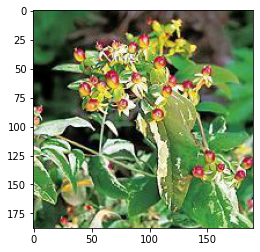

Actual: flower
Predicted flower


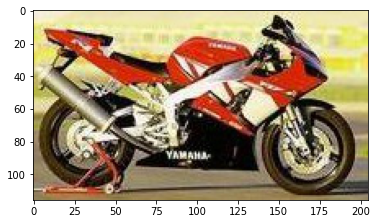

Actual: motorbike
Predicted motorbike


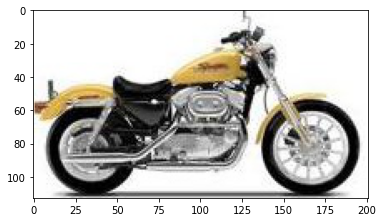

Actual: motorbike
Predicted motorbike


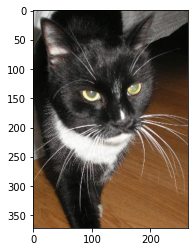

Actual: cat
Predicted cat


In [ ]:
for i in r_d:
    img_pred(i, model)

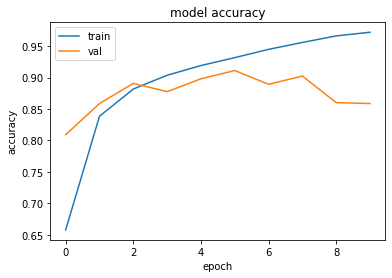

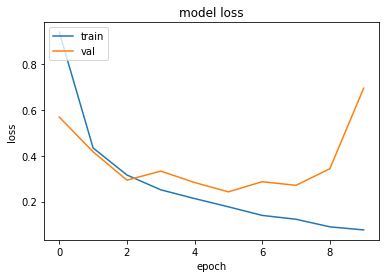

In [ ]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

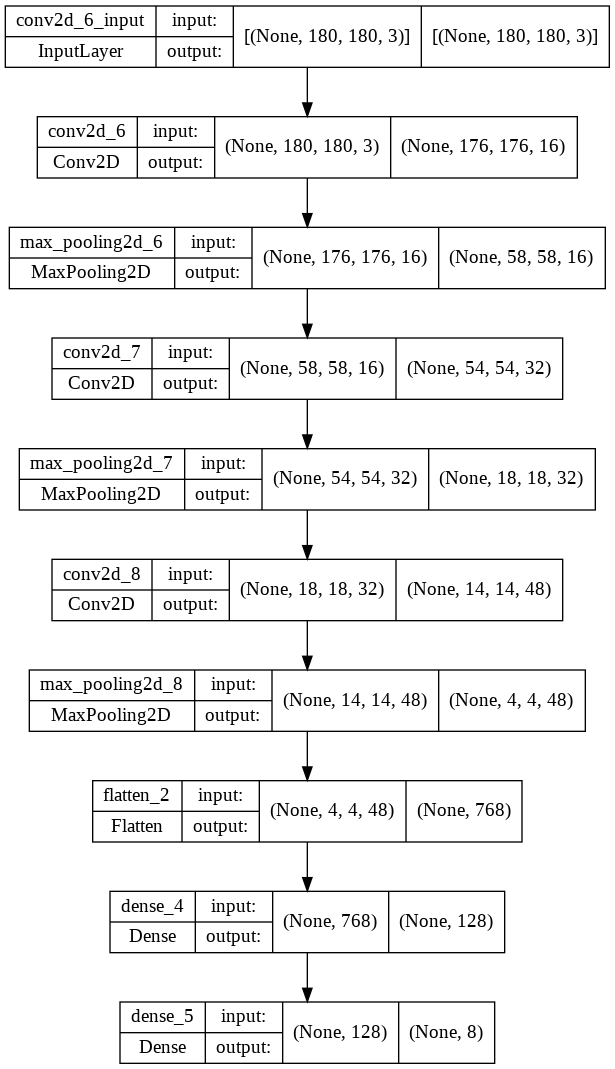

In [ ]:
def model2(input_shape, pool_size=(3,3)):
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(16, (5, 5), input_shape = input_shape, activation = 'relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = pool_size,strides= pool_size))
    
    model.add(tf.keras.layers.Conv2D(32, (5, 5), input_shape = input_shape, activation = 'relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = pool_size,strides= pool_size))
    
    model.add(tf.keras.layers.Conv2D(48, (5, 5), activation = 'relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = pool_size,strides= pool_size))
    
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
    num_classes = 8
    
    model.add(tf.keras.layers.Dense(units = num_classes, activation = 'softmax'))
    
    return model    

model = model2(input_shape=(180,180) + (3,))
tf.keras.utils.plot_model(model, show_shapes=True)





In [ ]:
epochs = 10

model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=["categorical_accuracy"],
)

tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph2', histogram_freq=0, write_graph=True, write_images=True)

history = model.fit(
    train_dataset, epochs=epochs, callbacks=[tbCallBack],
    validation_data=validation_dataset
)

Epoch 1/10
777/777 [==============================] - 20s 25ms/step - loss: 0.9394 - categorical_accuracy: 0.6577 - val_loss: 0.5688 - val_categorical_accuracy: 0.8090
Epoch 2/10
777/777 [==============================] - 16s 20ms/step - loss: 0.4341 - categorical_accuracy: 0.8384 - val_loss: 0.4173 - val_categorical_accuracy: 0.8586
Epoch 3/10
777/777 [==============================] - 16s 20ms/step - loss: 0.3160 - categorical_accuracy: 0.8817 - val_loss: 0.2935 - val_categorical_accuracy: 0.8907
Epoch 4/10
777/777 [==============================] - 16s 20ms/step - loss: 0.2514 - categorical_accuracy: 0.9036 - val_loss: 0.3329 - val_categorical_accuracy: 0.8776
Epoch 5/10
777/777 [==============================] - 16s 20ms/step - loss: 0.2132 - categorical_accuracy: 0.9190 - val_loss: 0.2833 - val_categorical_accuracy: 0.8980
Epoch 6/10
777/777 [==============================] - 16s 21ms/step - loss: 0.1772 - categorical_accuracy: 0.9316 - val_loss: 0.2424 - val_categorical_accuracy:

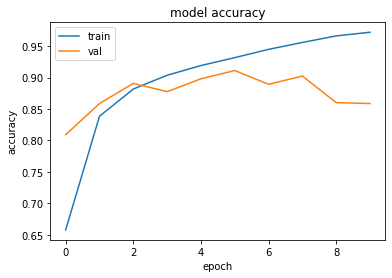

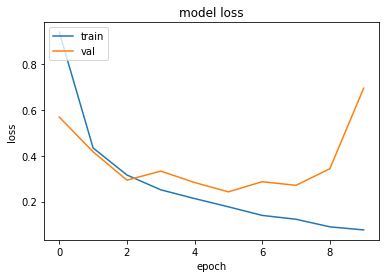

In [ ]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save("drive/MyDrive/saved_model/modeltwo")

INFO:tensorflow:Assets written to: drive/MyDrive/saved_model/modeltwo/assets


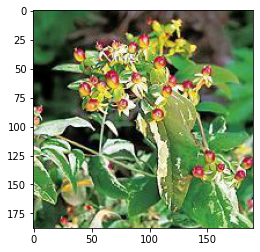

Actual: flower
Predicted flower


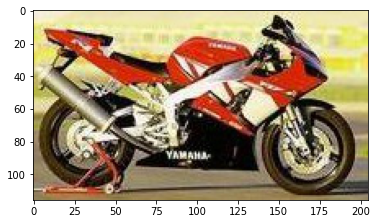

Actual: motorbike
Predicted motorbike


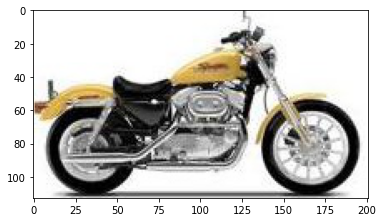

Actual: motorbike
Predicted motorbike


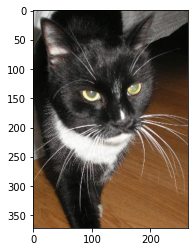

Actual: cat
Predicted cat


In [ ]:
for i in r_d:
    img_pred(i, model)

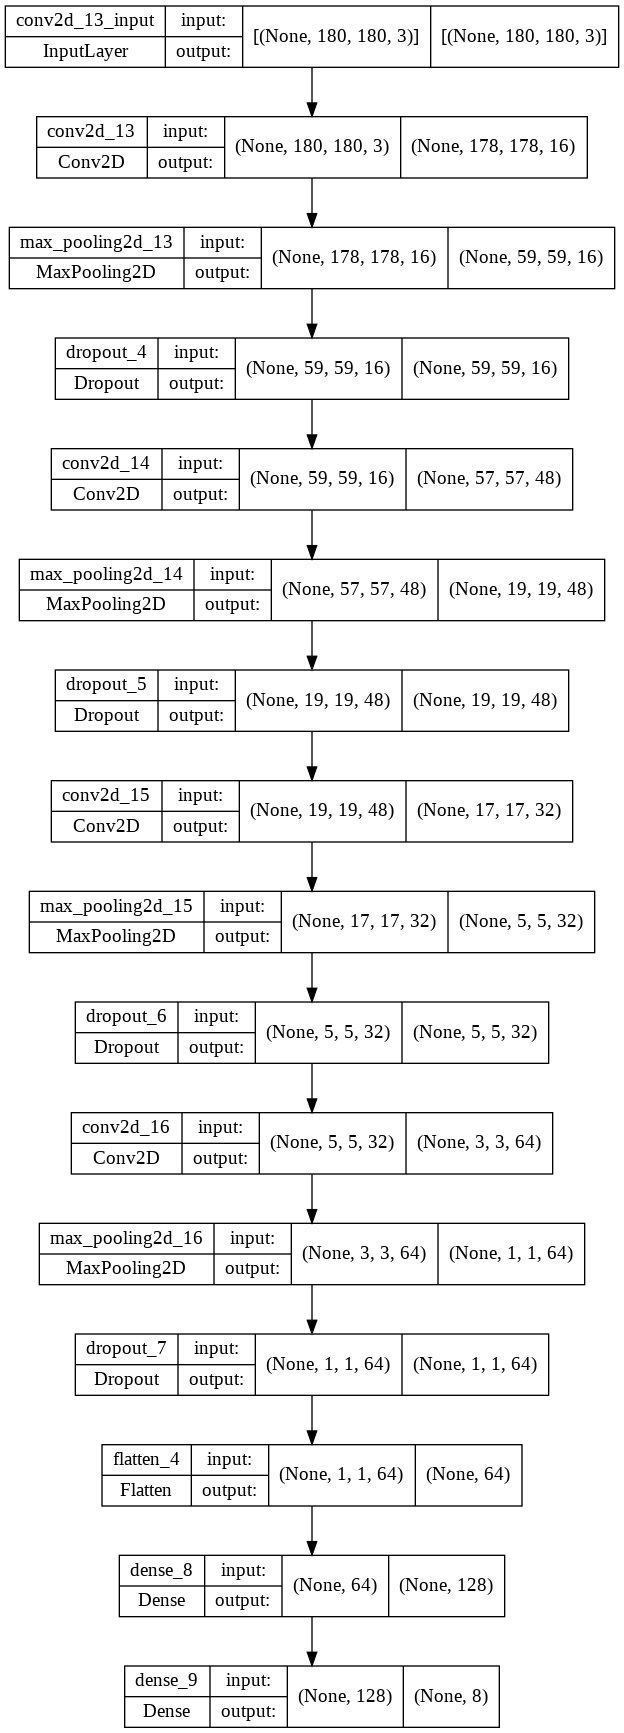

In [ ]:
def model3(input_shape, pool_size=(3,3)):
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(16, (3, 3), input_shape = input_shape, activation = 'relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = pool_size))
    
    model.add(tf.keras.layers.Dropout(.2))

    model.add(tf.keras.layers.Conv2D(48, (3, 3), input_shape = input_shape, activation = 'relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = pool_size))

    model.add(tf.keras.layers.Dropout(.2))


    model.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape = input_shape, activation = 'relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = pool_size))

    model.add(tf.keras.layers.Dropout(.2))

    
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = pool_size))

    model.add(tf.keras.layers.Dropout(.2))

    
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
    num_classes = 8
    
    model.add(tf.keras.layers.Dense(units = num_classes, activation = 'softmax'))
    
    return model    

model = model3(input_shape=(180,180) + (3,))
tf.keras.utils.plot_model(model, show_shapes=True)





In [ ]:
epochs = 25

model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=["categorical_accuracy"],
)

tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph3', histogram_freq=0, write_graph=True, write_images=True)

history = model.fit(
    train_dataset, epochs=epochs, callbacks=[tbCallBack],
    validation_data=validation_dataset
)

Epoch 1/25
777/777 [==============================] - 17s 20ms/step - loss: 1.3557 - categorical_accuracy: 0.4814 - val_loss: 0.8664 - val_categorical_accuracy: 0.6983
Epoch 2/25
777/777 [==============================] - 15s 20ms/step - loss: 0.7037 - categorical_accuracy: 0.7410 - val_loss: 0.5617 - val_categorical_accuracy: 0.7813
Epoch 3/25
777/777 [==============================] - 15s 20ms/step - loss: 0.5527 - categorical_accuracy: 0.7961 - val_loss: 0.4709 - val_categorical_accuracy: 0.8236
Epoch 4/25
777/777 [==============================] - 15s 20ms/step - loss: 0.4702 - categorical_accuracy: 0.8205 - val_loss: 0.3572 - val_categorical_accuracy: 0.8528
Epoch 5/25
777/777 [==============================] - 15s 20ms/step - loss: 0.3932 - categorical_accuracy: 0.8473 - val_loss: 0.3649 - val_categorical_accuracy: 0.8571
Epoch 6/25
777/777 [==============================] - 15s 20ms/step - loss: 0.3799 - categorical_accuracy: 0.8489 - val_loss: 0.3220 - val_categorical_accuracy:

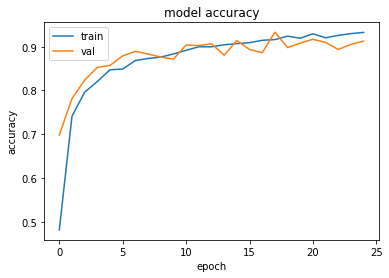

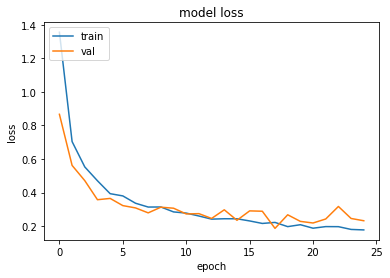

In [ ]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save("drive/MyDrive/saved_model/modelthree")

INFO:tensorflow:Assets written to: drive/MyDrive/saved_model/modelthree/assets


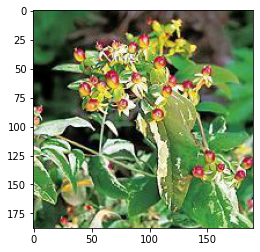

Actual: flower
Predicted flower


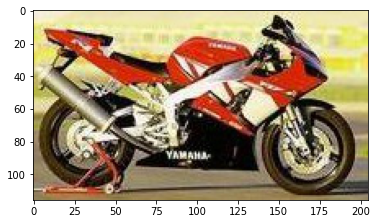

Actual: motorbike
Predicted motorbike


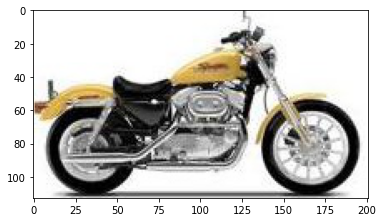

Actual: motorbike
Predicted motorbike


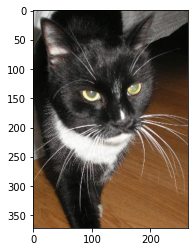

Actual: cat
Predicted cat


In [ ]:
for i in r_d:
    img_pred(i, model)